In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Car Depriciation.csv")

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Initial_Price,KM_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


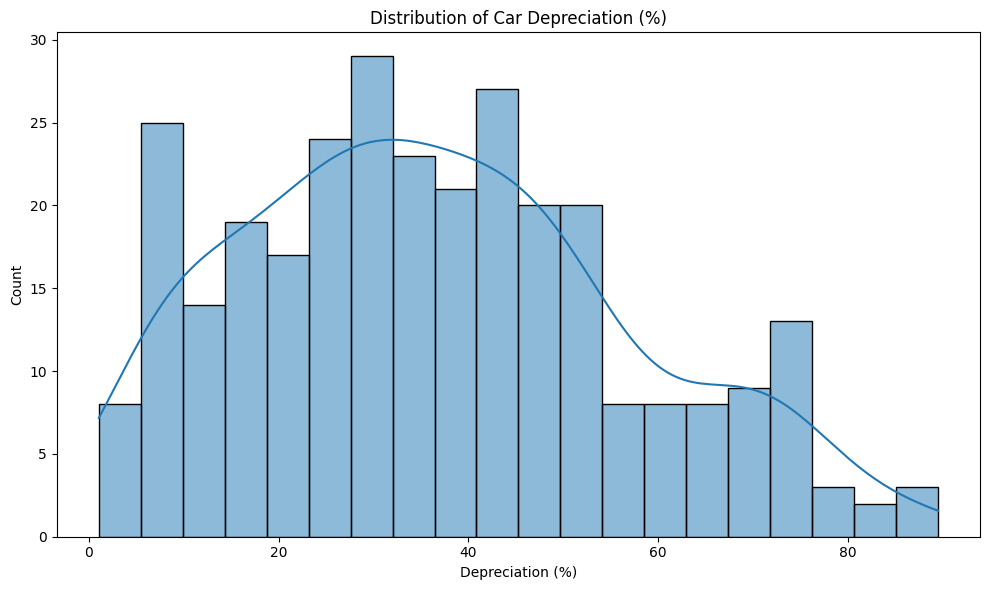

In [8]:
df['Depreciation (%)'] = (1 - df['Selling_Price'] / df['Initial_Price']) * 100

plt.figure(figsize=(10, 6))
sns.histplot(df['Depreciation (%)'], bins=20, kde=True)
plt.title('Distribution of Car Depreciation (%)')
plt.xlabel('Depreciation (%)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\Oscar\AppData\Local\Temp\ipykernel_6436\3078342923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Fuel_Type', y='Selling_Price', estimator='mean', palette='Set2')


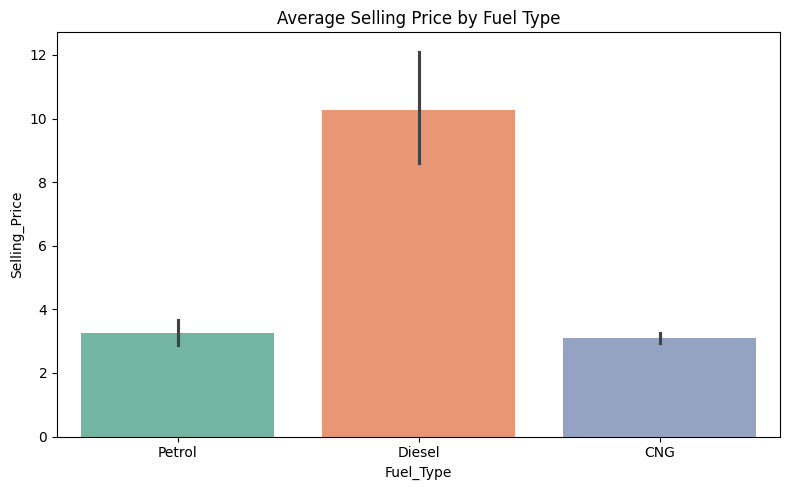

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price', estimator='mean', palette='Set2')
plt.title('Average Selling Price by Fuel Type')
plt.tight_layout()
plt.show()

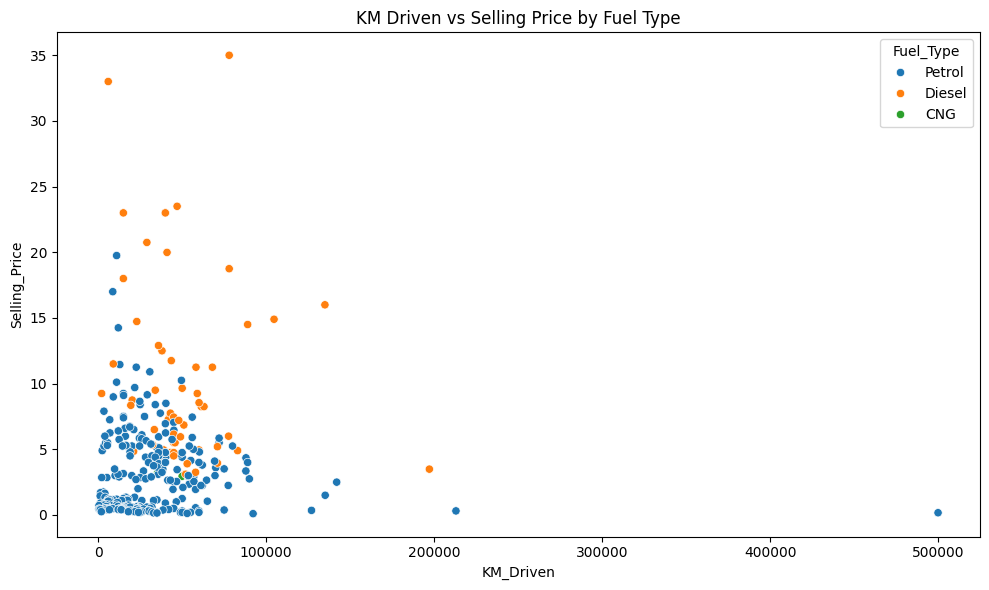

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='KM_Driven', y='Selling_Price', hue='Fuel_Type')
plt.title('KM Driven vs Selling Price by Fuel Type')
plt.tight_layout()
plt.show()

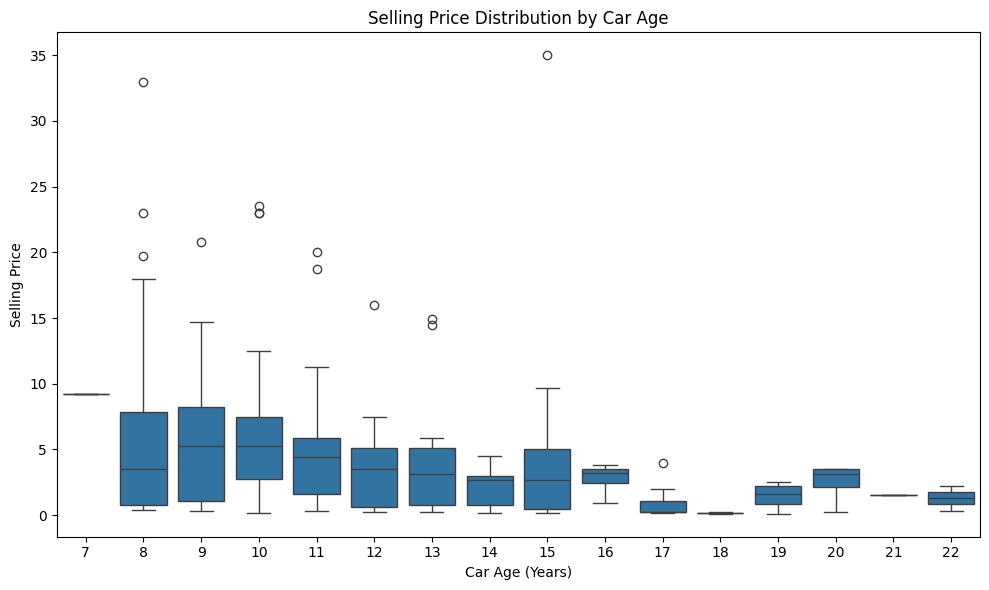

In [11]:
df['Car_Age'] = 2025 - df['Year']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Car_Age', y='Selling_Price')
plt.title('Selling Price Distribution by Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Initial_Price,KM_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation (%),Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,40.071556,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,50.209644,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,26.395939,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,31.325301,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,33.042213,11


C:\Users\Oscar\AppData\Local\Temp\ipykernel_6436\2331350110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Transmission', palette='pastel')


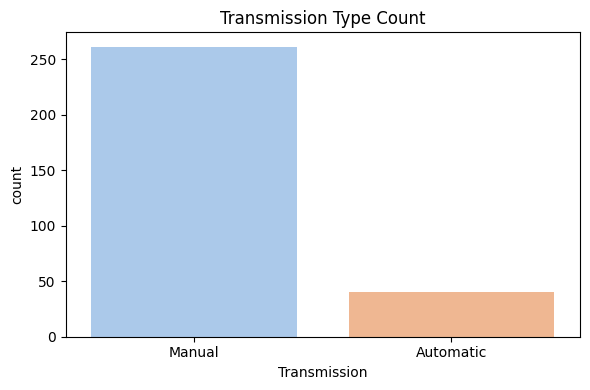

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Transmission', palette='pastel')
plt.title('Transmission Type Count')
plt.tight_layout()
plt.show()

In [15]:
import statsmodels.api as sm

X = df[['Initial_Price', 'KM_Driven', 'Car_Age']]
X = sm.add_constant(X)
y = df['Selling_Price']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     561.5
Date:                Mon, 09 Jun 2025   Prob (F-statistic):          5.08e-122
Time:                        15:33:03   Log-Likelihood:                -630.36
No. Observations:                 301   AIC:                             1269.
Df Residuals:                     297   BIC:                             1284.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1699      0.500     12.346